In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

In [76]:
jtplot.style('default', grid=False)

In [ ]:
filename = f'../rga/20190530_160114_Background_FIB_evaporation SEM_scan.asc'
dfin = pd.read_table(filename, sep='\t', skiprows=1, header=1, decimal=',', encoding='ascii')
dfin.columns = ["datetime", "p_chamber" ,"p_act", "p_lock",	"p_pre-inj", "t_valve",	"valve", "time_on"]

dfin["datetime"] = dfin["datetime"].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S.%f'))


In [8]:
1/0.03
6406-11

6395

#####  Import structure:
 - Import one spectrum with corresponding spectrum number (0-Nspectra) and datetime
 - Infer nrows for each spectrum
 - Infer number of spectra
 - Import recursively next spectra with datetime and discard mass column (common)
 - Concatenate columns in final dataframe
 - Check correct content of columns: if a str is included, something went wrong
 - Infer mass step from total range (200 amu) and first step

In [3]:
filename = f'../rga/20190530_160114_Background_FIB_evaporation SEM_scan.asc'

## Find number of spectra

In [203]:
number_lines = sum(1 for line in open(filename))
spectrum_range = 200
resolution = 32 # Points per amu
buffer_lines = 8 # Buffer header lines between spectra
Nrows = spectrum_range*resolution
n_spectra = round(number_lines/Nrows)
n_spectra

376

# Import first spectrum (keep mass column)

In [294]:
df0 = pd.read_csv(filename, sep='\t', skiprows=buffer_lines+3, nrows=Nrows-buffer_lines, header=1, decimal=",", names=['mass', 'ion_current'], encoding='ascii')
# df0['mass'] = [x.replace(',', '.') for x in df0['mass']]
# df0.mass.astype(np.float64, decimal=',')
df0

,mass,ion_current
0,0.00,2.029391e-13
1,0.03,9.002716e-14
2,0.06,2.947977e-14
3,0.09,7.787535e-15
4,0.13,7.010253e-15
5,0.16,2.549911e-14
6,0.19,7.725514e-14
7,0.22,1.703174e-13
8,0.25,2.817735e-13
9,0.28,3.692185e-13


# Import next spectra 

## Concat all spectra dropping the 'mass' column

In [304]:
test_nspectra = 10
df1 = pd.concat([pd.read_csv(filename, sep='\t', skiprows= i * Nrows + buffer_lines+2, nrows=Nrows-buffer_lines,
                      header=1, decimal=',', encoding='ascii', names=['a', 'ion_current']).drop('a', axis=1) for i in range(1,test_nspectra)], axis=1)
print(df1)

       ion_current   ion_current   ion_current   ion_current   ion_current  \
0     2.377479e-13  2.395801e-13  2.229451e-13  2.668479e-13  2.213340e-13   
1     1.095443e-13  1.046205e-13  1.013087e-13  1.269705e-13  9.764098e-14   
2     3.661732e-14  3.348599e-14  3.370267e-14  4.359769e-14  3.162499e-14   
3     9.497181e-15  8.829965e-15  9.196731e-15  1.143590e-14  8.149311e-15   
4     7.088528e-15  8.913118e-15  9.267718e-15  7.945370e-15  6.773508e-15   
5     2.532124e-14  3.338182e-14  3.346790e-14  2.750283e-14  2.469079e-14   
6     7.970691e-14  1.014546e-13  9.748399e-14  8.548160e-14  7.700005e-14   
7     1.846733e-13  2.232155e-13  2.042240e-13  1.946333e-13  1.774026e-13   
8     3.223727e-13  3.651644e-13  3.185554e-13  3.323271e-13  3.115227e-13   
9     4.395234e-13  4.655847e-13  3.950973e-13  4.431794e-13  4.359257e-13   
10    4.898788e-13  4.962289e-13  4.298204e-13  4.870127e-13  5.119258e-13   
11    4.752948e-13  4.826365e-13  4.521495e-13  4.723829e-13  5.

## Find all datetimes

In [313]:
dtstr = np.array([pd.read_csv(filename, sep='\t', skiprows=Nrows * i + buffer_lines+2, nrows=1, header=None).iloc[0,1] for i in range(test_nspectra)])
dt = np.array([datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f ') for x in dtstr])
dt

array([datetime.datetime(2019, 5, 31, 7, 50, 25, 248000),
       datetime.datetime(2019, 5, 31, 7, 51, 9, 150000),
       datetime.datetime(2019, 5, 31, 7, 51, 53, 42000),
       datetime.datetime(2019, 5, 31, 7, 52, 36, 862000),
       datetime.datetime(2019, 5, 31, 7, 53, 20, 751000),
       datetime.datetime(2019, 5, 31, 7, 54, 4, 578000),
       datetime.datetime(2019, 5, 31, 7, 54, 48, 342000),
       datetime.datetime(2019, 5, 31, 7, 55, 32, 287000),
       datetime.datetime(2019, 5, 31, 7, 56, 16, 178000),
       datetime.datetime(2019, 5, 31, 7, 57, 0, 93000)], dtype=object)

## Append first spectrum and set column names from dt

In [314]:
len(df.columns), len(dt)

(10, 10)

In [316]:
df = pd.concat([df0,df1], axis=1)
df.set_index(['mass'], inplace=True)
df.columns = [dt]
df

,2019-05-31 07:50:25.248,2019-05-31 07:51:09.150,2019-05-31 07:51:53.042,2019-05-31 07:52:36.862,2019-05-31 07:53:20.751,2019-05-31 07:54:04.578,2019-05-31 07:54:48.342,2019-05-31 07:55:32.287,2019-05-31 07:56:16.178,2019-05-31 07:57:00.093
mass,,,,,,,,,,
0.00,2.029391e-13,2.377479e-13,2.395801e-13,2.229451e-13,2.668479e-13,2.213340e-13,2.439700e-13,2.088545e-13,1.899495e-13,1.861633e-13
0.03,9.002716e-14,1.095443e-13,1.046205e-13,1.013087e-13,1.269705e-13,9.764098e-14,1.070483e-13,9.568103e-14,7.997184e-14,8.291194e-14
0.06,2.947977e-14,3.661732e-14,3.348599e-14,3.370267e-14,4.359769e-14,3.162499e-14,3.442959e-14,3.192364e-14,2.509571e-14,2.701800e-14
0.09,7.787535e-15,9.497181e-15,8.829965e-15,9.196731e-15,1.143590e-14,8.149311e-15,9.077446e-15,9.106426e-15,6.486934e-15,7.433957e-15
0.13,7.010253e-15,7.088528e-15,8.913118e-15,9.267718e-15,7.945370e-15,6.773508e-15,8.966153e-15,1.125604e-14,6.207275e-15,8.637750e-15
0.16,2.549911e-14,2.532124e-14,3.338182e-14,3.346790e-14,2.750283e-14,2.469079e-14,3.344853e-14,4.180235e-14,2.327914e-14,3.276272e-14
0.19,7.725514e-14,7.970691e-14,1.014546e-13,9.748399e-14,8.548160e-14,7.700005e-14,1.019195e-13,1.209560e-13,7.221655e-14,9.896505e-14
0.22,1.703174e-13,1.846733e-13,2.232155e-13,2.042240e-13,1.946333e-13,1.774026e-13,2.257964e-13,2.515158e-13,1.647434e-13,2.188364e-13
0.25,2.817735e-13,3.223727e-13,3.651644e-13,3.185554e-13,3.323271e-13,3.115227e-13,3.741761e-13,3.902026e-13,2.849792e-13,3.686210e-13


# Write file 

In [21]:
outPath = os.path.dirname(os.path.abspath(filename))
outName = os.path.splitext(os.path.basename(filename))[0]
outFile = os.path.join(outPath, outName+'.txt')

df.to_csv(outFile)

NameError: name 'df' is not defined

# Import MID (Multi Ion Data) 

### Read the ion masses names from the data header using nrows = 1

In [147]:
filename = f'../rga_data/20190603_155151_Faraday_MID_ALI_air_500mbar_10ms_10pulses.asc'
head = pd.read_csv(filename, sep='\s+', skiprows=5, nrows=1)
names = head.columns.values
names

array(['14', '16', '18', '28', '32', '40', '44', 'Methanol', 'Methanol.1',
       'Methanol.2'], dtype=object)

### Establish the column names (timestamp, relative_time and ion_current)

In [148]:
index2 = np.array(['time', 'rel_time', 'ion_current'])
mat = [names, index2]
mat

[array(['14', '16', '18', '28', '32', '40', '44', 'Methanol', 'Methanol.1',
        'Methanol.2'], dtype=object),
 array(['time', 'rel_time', 'ion_current'], dtype='<U11')]

###  Declare a MultiIndex object from the euclidean product ion_masses $\times$ properties

In [149]:
mi = pd.MultiIndex.from_product([names, index2], names=['mass', 'properties'])
mi.to_frame()


mass   properties
mass       properties                          
14         time                 14         time
           rel_time             14     rel_time
           ion_current          14  ion_current
16         time                 16         time
           rel_time             16     rel_time
           ion_current          16  ion_current
18         time                 18         time
           rel_time             18     rel_time
           ion_current          18  ion_current
28         time                 28         time
           rel_time             28     rel_time
           ion_current          28  ion_current
32         time                 32         time
           rel_time             32     rel_time
           ion_current          32  ion_current
40         time                 40         time
           rel_time             40     rel_time
           ion_current          40  ion_current
44         time                 44         time
           rel_time             44     rel_time
           ion_current          44  ion_current
Methanol   time           Methanol         time
           rel_time       Methanol     rel_time
           ion_current    Methanol  ion_current
Methanol.1 time         Methanol.1         time
           rel_time     Methanol.1     rel_time
           ion_current  Methanol.1  ion_current
Methanol.2 time         Methanol.2         time
           rel_time     Methanol.2     rel_time
           ion_current  Methanol.2  ion_current

### Read the actual data skipping headers and set the MultiIndex to its columns

In [304]:
df_mid = pd.read_csv(filename, sep='\t', skiprows=8, decimal=',', names=mi)
df_mid

14                                             16  \
                       time rel_time   ion_current                    time   
0    6/3/2019 03:58:53.258     0.000 -4.984074e-13  6/3/2019 03:58:53.379    
1    6/3/2019 03:58:54.458     1.200 -2.988646e-13  6/3/2019 03:58:54.569    
2    6/3/2019 03:58:55.570     2.312  7.286906e-12  6/3/2019 03:58:55.681    
3    6/3/2019 03:58:56.686     3.427  7.224265e-12  6/3/2019 03:58:56.797    
4    6/3/2019 03:58:57.801     4.543  6.123104e-12  6/3/2019 03:58:57.912    
5    6/3/2019 03:58:58.913     5.655  5.879618e-12  6/3/2019 03:58:59.024    
6    6/3/2019 03:59:00.026     6.768  5.741887e-12  6/3/2019 03:59:00.137    
7    6/3/2019 03:59:01.138     7.880  5.664167e-12  6/3/2019 03:59:01.249    
8    6/3/2019 03:59:02.250     8.992  5.585734e-12  6/3/2019 03:59:02.361    
9    6/3/2019 03:59:03.363    10.105  5.525724e-12  6/3/2019 03:59:03.474    
10   6/3/2019 03:59:04.476    11.217  5.469705e-12  6/3/2019 03:59:04.586    
11   6/3/2019 03:59:05.589    12.330  5.422274e-12  6/3/2019 03:59:05.699    
12   6/3/2019 03:59:06.701    13.442  5.374418e-12  6/3/2019 03:59:06.812    
13   6/3/2019 03:59:07.813    14.554  5.330368e-12  6/3/2019 03:59:07.923    
14   6/3/2019 03:59:08.925    15.666  5.278483e-12  6/3/2019 03:59:09.036    
15   6/3/2019 03:59:10.037    16.778  5.254475e-12  6/3/2019 03:59:10.147    
16   6/3/2019 03:59:11.149    17.890  5.204256e-12  6/3/2019 03:59:11.261    
17   6/3/2019 03:59:12.262    19.003  5.173733e-12  6/3/2019 03:59:12.373    
18   6/3/2019 03:59:13.374    20.115  5.140056e-12  6/3/2019 03:59:13.485    
19   6/3/2019 03:59:14.486    21.227  5.098890e-12  6/3/2019 03:59:14.597    
20   6/3/2019 03:59:15.598    22.339  5.065169e-12  6/3/2019 03:59:15.710    
21   6/3/2019 03:59:16.711    23.452  5.035862e-12  6/3/2019 03:59:16.822    
22   6/3/2019 03:59:17.823    24.564  5.016757e-12  6/3/2019 03:59:17.934    
23   6/3/2019 03:59:18.935    25.676  4.980912e-12  6/3/2019 03:59:19.047    
24   6/3/2019 03:59:20.048    26.789  4.970333e-12  6/3/2019 03:59:20.159    
25   6/3/2019 03:59:21.160    27.901  4.944258e-12  6/3/2019 03:59:21.271    
26   6/3/2019 03:59:22.272    29.013  4.931741e-12  6/3/2019 03:59:22.383    
27   6/3/2019 03:59:23.384    30.125  4.895075e-12  6/3/2019 03:59:23.495    
28   6/3/2019 03:59:24.496    31.238  4.871640e-12  6/3/2019 03:59:24.608    
29   6/3/2019 03:59:25.608    32.350  4.872275e-12  6/3/2019 03:59:25.720    
..                      ...      ...           ...                     ...   
430  6/3/2019 04:06:52.668   479.409  1.952808e-12  6/3/2019 04:06:52.786    
431  6/3/2019 04:06:53.788   480.529  1.945698e-12  6/3/2019 04:06:53.913    
432  6/3/2019 04:06:54.914   481.656  1.957014e-12  6/3/2019 04:06:55.033    
433  6/3/2019 04:06:56.034   482.776  1.952461e-12  6/3/2019 04:06:56.145    
434  6/3/2019 04:06:57.146   483.888  1.945483e-12  6/3/2019 04:06:57.265    
435  6/3/2019 04:06:58.266   485.008  1.959255e-12  6/3/2019 04:06:58.378    
436  6/3/2019 04:06:59.379   486.121  1.963582e-12  6/3/2019 04:06:59.500    
437  6/3/2019 04:07:00.499   487.241  1.952826e-12  6/3/2019 04:07:00.624    
438  6/3/2019 04:07:01.625   488.367  1.953241e-12  6/3/2019 04:07:01.740    
439  6/3/2019 04:07:02.741   489.482  1.953895e-12  6/3/2019 04:07:02.858    
440  6/3/2019 04:07:03.859   490.601  1.948804e-12  6/3/2019 04:07:03.977    
441  6/3/2019 04:07:04.978   491.720  1.955823e-12  6/3/2019 04:07:05.091    
442  6/3/2019 04:07:06.093   492.834  1.945983e-12  6/3/2019 04:07:06.208    
443  6/3/2019 04:07:07.208   493.950  1.949920e-12  6/3/2019 04:07:07.320    
444  6/3/2019 04:07:08.320   495.062  1.948938e-12  6/3/2019 04:07:08.439    
445  6/3/2019 04:07:09.440   496.181  1.958241e-12  6/3/2019 04:07:09.557    
446  6/3/2019 04:07:10.558   497.299  1.952894e-12  6/3/2019 04:07:10.677    
447  6/3/2019 04:07:11.678   498.419  1.941241e-12  6/3/2019 04:07:11.789    
448  6/3/2019 04:07:12.790   499.531  1.941424e

In [150]:
df_mid.columns = mi
df_mid

mass                            14                         \
properties                    time rel_time   ion_current   
0           6/3/2019 03:58:54.458     1.200 -2.988646e-13   
1           6/3/2019 03:58:55.570     2.312  7.286906e-12   
2           6/3/2019 03:58:56.686     3.427  7.224265e-12   
3           6/3/2019 03:58:57.801     4.543  6.123104e-12   
4           6/3/2019 03:58:58.913     5.655  5.879618e-12   
5           6/3/2019 03:59:00.026     6.768  5.741887e-12   
6           6/3/2019 03:59:01.138     7.880  5.664167e-12   
7           6/3/2019 03:59:02.250     8.992  5.585734e-12   
8           6/3/2019 03:59:03.363    10.105  5.525724e-12   
9           6/3/2019 03:59:04.476    11.217  5.469705e-12   
10          6/3/2019 03:59:05.589    12.330  5.422274e-12   
11          6/3/2019 03:59:06.701    13.442  5.374418e-12   
12          6/3/2019 03:59:07.813    14.554  5.330368e-12   
13          6/3/2019 03:59:08.925    15.666  5.278483e-12   
14          6/3/2019 03:59:10.037    16.778  5.254475e-12   
15          6/3/2019 03:59:11.149    17.890  5.204256e-12   
16          6/3/2019 03:59:12.262    19.003  5.173733e-12   
17          6/3/2019 03:59:13.374    20.115  5.140056e-12   
18          6/3/2019 03:59:14.486    21.227  5.098890e-12   
19          6/3/2019 03:59:15.598    22.339  5.065169e-12   
20          6/3/2019 03:59:16.711    23.452  5.035862e-12   
21          6/3/2019 03:59:17.823    24.564  5.016757e-12   
22          6/3/2019 03:59:18.935    25.676  4.980912e-12   
23          6/3/2019 03:59:20.048    26.789  4.970333e-12   
24          6/3/2019 03:59:21.160    27.901  4.944258e-12   
25          6/3/2019 03:59:22.272    29.013  4.931741e-12   
26          6/3/2019 03:59:23.384    30.125  4.895075e-12   
27          6/3/2019 03:59:24.496    31.238  4.871640e-12   
28          6/3/2019 03:59:25.608    32.350  4.872275e-12   
29          6/3/2019 03:59:26.721    33.463  4.844825e-12   
..                             ...      ...           ...   
429         6/3/2019 04:06:52.668   479.409  1.952808e-12   
430         6/3/2019 04:06:53.788   480.529  1.945698e-12   
431         6/3/2019 04:06:54.914   481.656  1.957014e-12   
432         6/3/2019 04:06:56.034   482.776  1.952461e-12   
433         6/3/2019 04:06:57.146   483.888  1.945483e-12   
434         6/3/2019 04:06:58.266   485.008  1.959255e-12   
435         6/3/2019 04:06:59.379   486.121  1.963582e-12   
436         6/3/2019 04:07:00.499   487.241  1.952826e-12   
437         6/3/2019 04:07:01.625   488.367  1.953241e-12   
438         6/3/2019 04:07:02.741   489.482  1.953895e-12   
439         6/3/2019 04:07:03.859   490.601  1.948804e-12   
440         6/3/2019 04:07:04.978   491.720  1.955823e-12   
441         6/3/2019 04:07:06.093   492.834  1.945983e-12   
442         6/3/2019 04:07:07.208   493.950  1.949920e-12   
443         6/3/2019 04:07:08.320   495.062  1.948938e-12   
444         6/3/2019 04:07:09.440   496.181  1.958241e-12   
445         6/3/2019 04:07:10.558   497.299  1.952894e-12   
446         6/3/2019 04:07:11.678   498.419  1.941241e-12   
447         6/3/2019 04:07:12.790   499.531  1.941424e-12   
448         6/3/2019 04:07:13.902   500.643  1.944897e-12   
449         6/3/2019 04:07:15.014   501.755  1.949183e-12   
450         6/3/2019 04:07:16.126   502.867  1.950903e-12   
451         6/3/2019 04:07:17.241   503.983  1.956904e-12   
452         6/3/2019 04:07:18.367   505.108  1.950574e-12   
453         6/3/2019 04:07:19.480   506.221  1.953522e-12   
454         6/3/2019 04:07:20.599   507.340  1.948224e-12   
455         6/3/2019 04:07:21.726   508.467  1.941643e-12   
456         6/3/2019 04:07:22.838   509.579  1.947899e-12   
457         6/3/2019 04:07:23.951   510.692  1.950440e-12   
458         6/3/2019 04:07:25.063   511.804  1.948114e-12   

mass                            16                         \
properties                    time rel_time   ion_current   
0           6/3/2019 03:58:54.569 

### Transform time columns from str to datetime (failed)

In [ ]:
dt = np.array([datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f ') for x in dtstr])
dfin["datetime"] = dfin["datetime"].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S.%f'))


In [247]:
df_mid.dropna(inplace=True)

In [305]:
new_d = df_mid.copy()
for m in df_mid.columns.get_level_values(level=0).drop_duplicates():
    new_series = df_mid[m].time.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S.%f '))
    new_d[m].time = new_series

TypeError: strptime() argument 1 must be str, not float

In [144]:
def load_mid_data(filename : str) -> pd.DataFrame:
    """Load data from filename_MID_.asc into DataFrame df_mid with MultiIndex:
        Level 0 are the ion_masses as they appear in the file line 7
        Level 1 are the (timestamp, relative time and ion_current [A]) for each ion"""
    
    head = pd.read_csv(filename, sep='\s+', skiprows=5, nrows=1)
    names = head.columns.values

    ##### Establish the column names (timestamp, relative_time and ion_current) as index in level 1
    index2 = np.array(['time', 'rel_time', 'ion_current'])

    #####  Declare a MultiIndex object from the euclidean product ion_masses $\times$ properties
    mi = pd.MultiIndex.from_product([names, index2], names=['mass', 'properties'])

    ##### Read the actual data skipping headers and set the MultiIndex to its columns
    df_mid = pd.read_csv(filename, sep='\t', skiprows=8, decimal=',')
    df_mid.columns = mi
    
    return df_mid

## Plot scan lines for all peaks

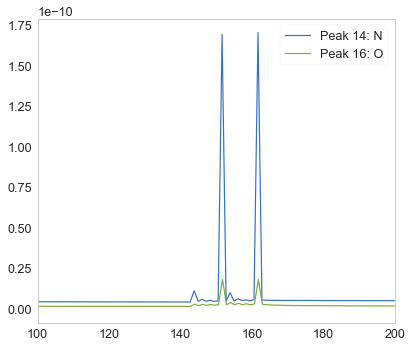

In [151]:
x = df_mid['14'].rel_time.values
y = df_mid['14'].ion_current.values
plt.plot(x,y, '-', label='Peak 14: N')
plt.plot(df_mid['16'].rel_time.values, df_mid['16'].ion_current.values, '-', label='Peak 16: O')
plt.xlim(100,200)
plt.legend(loc='best')

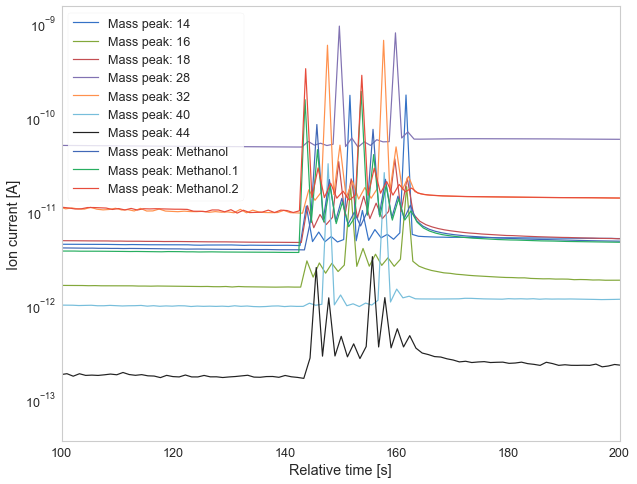

In [131]:
plt.figure(figsize=(10,8))
for m in df_mid.columns.get_level_values(level=0).drop_duplicates():
    x = df_mid[m].rel_time
    y = df_mid[m].ion_current
    
    plt.plot(x, y, '-', label='Mass peak: '+m)
plt.xlim((100, 200))
plt.xlabel('Relative time [s]')
plt.ylabel('Ion current [A]')
plt.yscale('log')
plt.legend()

In [140]:
def plot_MID(df_mid : pd.DataFrame, masses : list, 
             xlims : tuple = None):
    """Plot Multi Ion Data from RGA df_mid_mid (rel_time vs ion_current)
    Parameters
    ---------------
    df_mid : pd.DataFrame
        MID-type RGA data
    masses: list
        ion masses to plot as they appear in df_mid_mid
    xlims: tuple
        limits on x axis (in seconds
    Hint: to access all the names of the ions from df_mid_ion use 
        df_mid.columns.get_level_values(level=0).drop_duplicates()
    """
    plt.figure(figsize=(10,8))
    for m in masses:
        x = df_mid[m].rel_time
        y = df_mid[m].ion_current

        plt.plot(x, y, '-', label='Mass peak: '+m)
    
    if xlims != None:
        plt.xlim(xlims)
    plt.xlabel('Relative time [s]')
    plt.ylabel('Ion current [A]')
    plt.yscale('log')

    plt.legend()

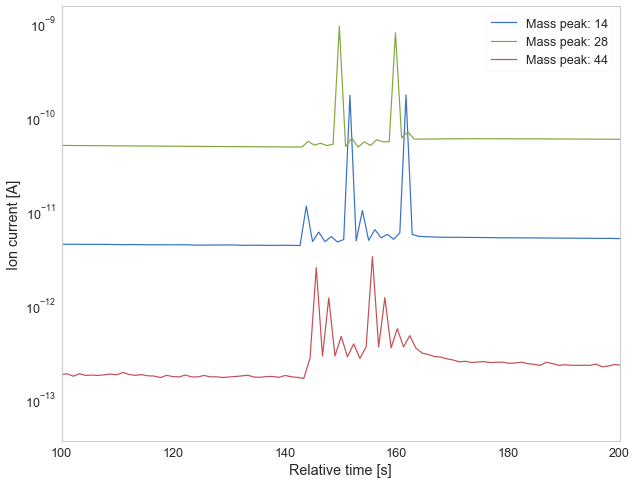

In [143]:
masses = ['14', '28', '44']
plot_MID(df, masses, xlims=(100,200))

# Outlook: test spectra 

In [ ]:
dftemp = pd.read_csv(filename, sep='\t', skiprows=start_line, nrows=Nrows-buffer_lines,
                        header=1, decimal=',', encoding='ascii', names=['mass', 'ion_current'])

    if type(dftemp.iloc[0,0]) == str:
        posError = np.where(dftemp.ion_current == 'Scan')[0][0]
        print(np.where(dftemp.ion_current == 'Scan')[0][0])
        print('Warning: cycle %i has a range of %i amu instead of %i'%(i, round(posError/resolution), spectrum_range))
        print(dftemp.iloc[posError:posError+buffer_lines-3,:])
        
        dftemp.drop(dftemp.index[posError-1:], inplace=True)
        print('posError: ',posError)
        
        start_line = posError + i*buffer_lines + 3 # Restart line count from next correct position
        print('start_line: ',start_line, 'Nrows: ', Nrows)
    else:
        start_line += Nrows + buffer_lines+2
    if i == 0:
        df1 = pd.concat([df1, dftemp], axis=1)
    else:
        df1 = pd.concat([df1, dftemp.drop(['mass'], axis=1)], axis=1)
    print(start_line)
#     print(dftemp)